In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from spectral_cube import SpectralCube
import astropy.units as u
from astropy.utils import data
from astropy.io import fits
import  aplpy

In [2]:
OAr = np.zeros((21,36))
OAb = np.zeros((21,36))
X_OAr = np.zeros((21,36))
X_OAb = np.zeros((21,36))


A  = np.zeros((21,2))
Mu = np.zeros((21,2))
Sig= np.zeros((21,2))
C  = np.zeros((21,2))
Mu_err = np.zeros((21,2))
Sig_err = np.zeros((21,2))

# Aquila_17

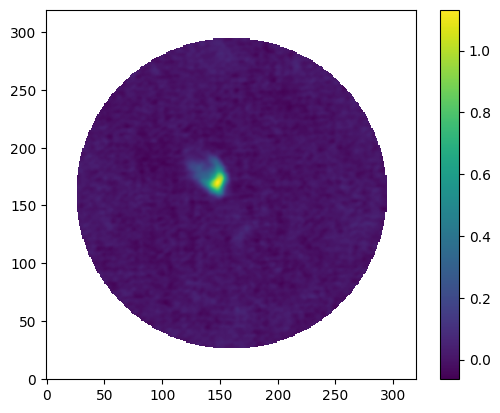

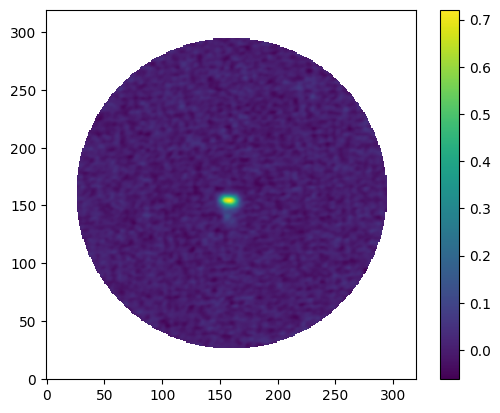

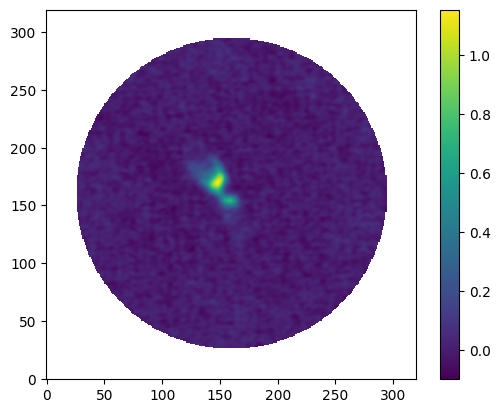

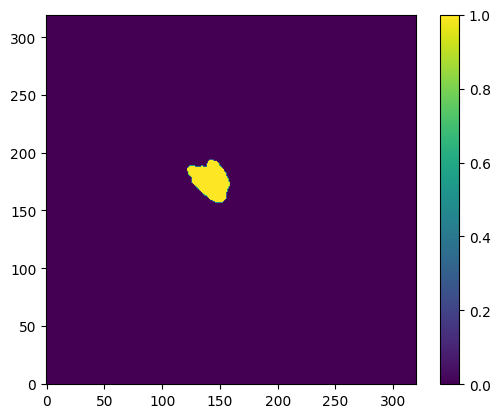

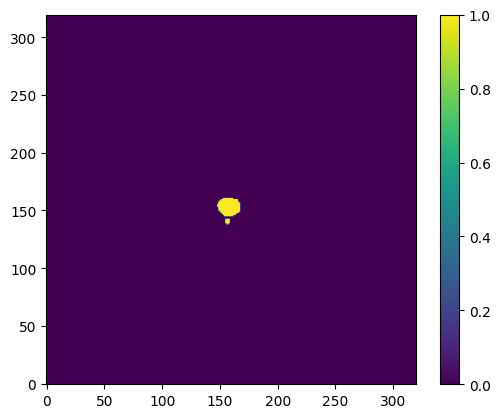

In [5]:
image_file_b = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_17_12co_blue.fits'
image_datab = fits.getdata(image_file_b, ext=0)

image_file_r = '/home/aiswarya/Desktop/CAMPOS_Analysis_Cham/Aquila/Aql_12co_moment0/Aql_17_12co_red.fits'
image_datar = fits.getdata(image_file_r, ext=0)

plt.imshow(image_datab,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(image_datar+image_datab,origin='lower')
plt.colorbar()
plt.show()

maskb = np.where(image_datab > 0.1,1.0,0.0 )
maskr = np.where(image_datar > 0.1,1.0,0.0 )

plt.imshow(maskb,origin='lower')
plt.colorbar()
plt.show()

plt.imshow(maskr,origin='lower')
plt.colorbar()
plt.show()

In [6]:
image_header = fits.getheader(image_file_r, ext=0)
#image_header#['CRPIX1']

In [7]:
#import skycoord, units, wcs, fits, from astropy
#from fits header create a wcs object
#using wcs object and ra dec inputs create a skycoord object
# wcsobj.worldttopix() convert the skycoord object to pixel x and y


from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename


f = fits.open(image_file_b)
image_header_b = fits.getheader(image_file_b, ext=0)
w = WCS(image_header_b)

sky = SkyCoord('18 31 52.17	-2 01 26.35', unit=(u.hourangle, u.deg))
x_source, y_source = w.world_to_pixel(sky)

print(x_source, y_source) 

152.5100799509222 157.49291908334382


(320, 320)


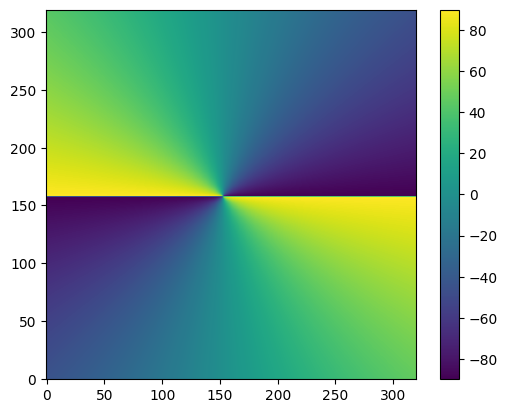

In [8]:
#print(image_header['CRPIX1'])
#print(image_header['CRPIX2'])

PA_grid = np.full((image_header['NAXIS1'],image_header['NAXIS2']),0.0)
print(PA_grid.shape)
 
for i in range(PA_grid.shape[0]):
    for j in range(PA_grid.shape[1]):
        x = i-y_source
        y = j-x_source
        if x ==0:
            #pass
            PA_grid[i][j] = -np.arctan(np.inf)/np.pi*180
        else:
            PA_grid[i][j] = -np.arctan(y/x)/np.pi*180
        
plt.imshow(PA_grid,origin='lower')
plt.colorbar()
plt.show()

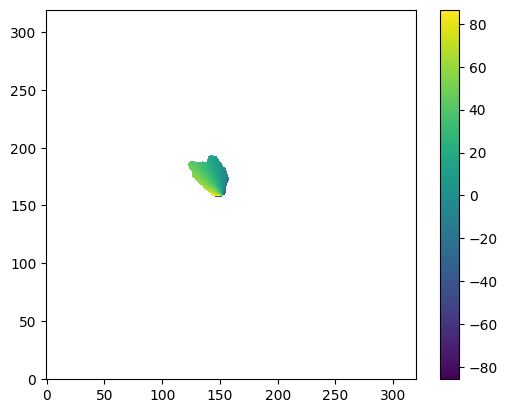

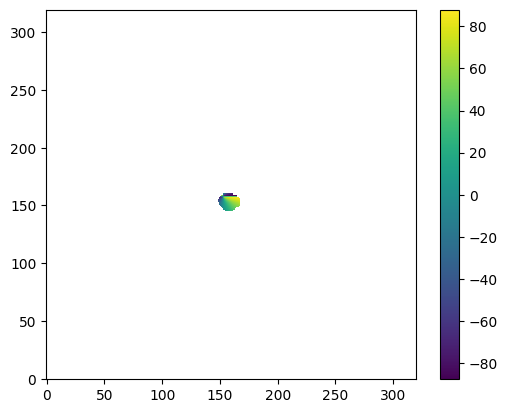

In [15]:
maskb[maskb==0]=np.nan
maskr[maskr==0]=np.nan

B = PA_grid*maskb
#B[250:,:] =np.nan
plt.imshow(B,origin='lower')
plt.colorbar()
plt.show()

R = PA_grid*maskr
R[:143,:] =np.nan
plt.imshow(R,origin='lower')
plt.colorbar()
plt.show()

In [9]:
#print(len(binrange))

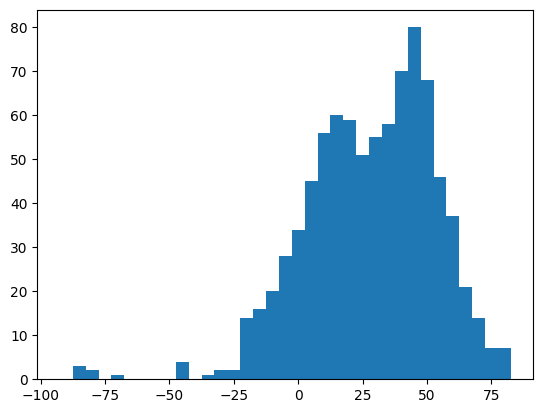

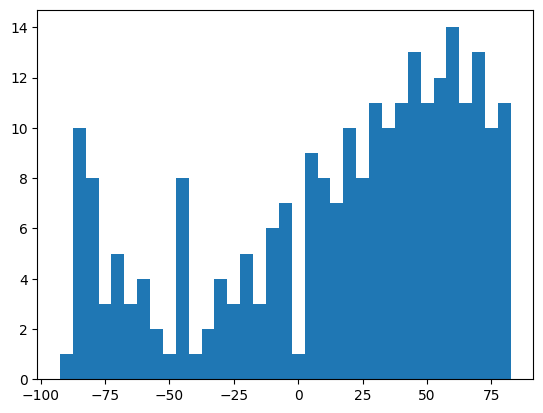

[ 0.  3.  2.  0.  1.  0.  0.  0.  0.  4.  0.  1.  2.  2. 14. 16. 20. 28.
 34. 45. 56. 60. 59. 51. 55. 58. 70. 80. 68. 46. 37. 21. 14.  7.  7.]
[-92.5 -87.5 -82.5 -77.5 -72.5 -67.5 -62.5 -57.5 -52.5 -47.5 -42.5 -37.5
 -32.5 -27.5 -22.5 -17.5 -12.5  -7.5  -2.5   2.5   7.5  12.5  17.5  22.5
  27.5  32.5  37.5  42.5  47.5  52.5  57.5  62.5  67.5  72.5  77.5  82.5]
35 36
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.]


In [16]:
binrange = np.arange(-92.5,87.5,5)
outputb = plt.hist(B.flatten(),bins=binrange)
plt.show()
outputr = plt.hist(R.flatten(),bins=binrange)
plt.show()

print(outputb[0])
print(outputb[1])
print(len(outputb[0]),len(outputb[1]))

PA = (outputb[1][0:-1]+outputb[1][1:])/2.0
print(PA)

(array([], dtype=int64),)


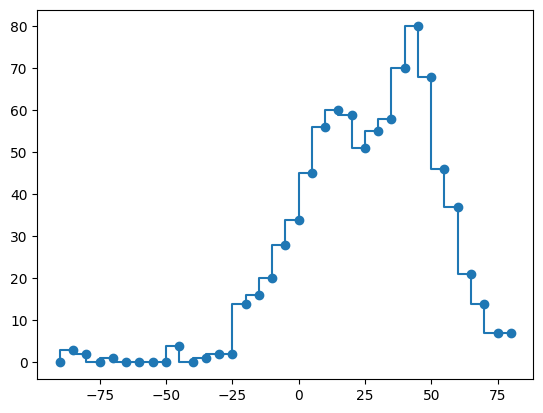

36


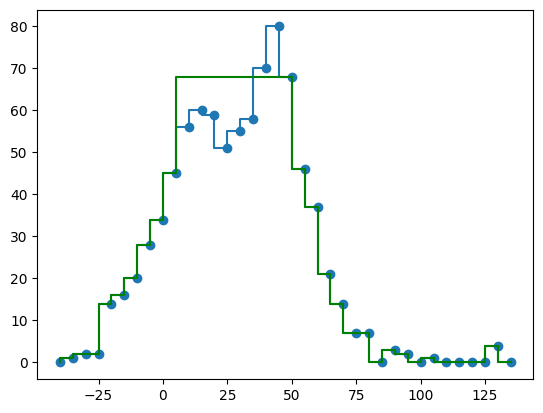

In [22]:
#BLUE

#PA=np.arange(2.5,177.5,5)
print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputb[0], ds='steps')
plt.scatter(PA,outputb[0])
plt.show()
#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputb[0][y1], ls='dashed', c='r')
#plt.axhline(outputb[0][y2],ls='dashed', c='g')
#plt.show()

cent=np.where(PA==-40)[0][0]

flipped_array_y=np.r_[outputb[0][cent:],(outputb[0][0:cent+1])]

flipped_array_x=PA2[cent:cent+len(flipped_array_y)]
print(len(flipped_array_y))
plt.plot(flipped_array_x,flipped_array_y, ds='steps')
plt.scatter(flipped_array_x,flipped_array_y)


x_subset = np.concatenate((flipped_array_x[:10], flipped_array_x[-18:]))
y_subset = np.concatenate((flipped_array_y[:10], flipped_array_y[-18:]))
plt.plot(x_subset,y_subset, ds='steps', color='g')

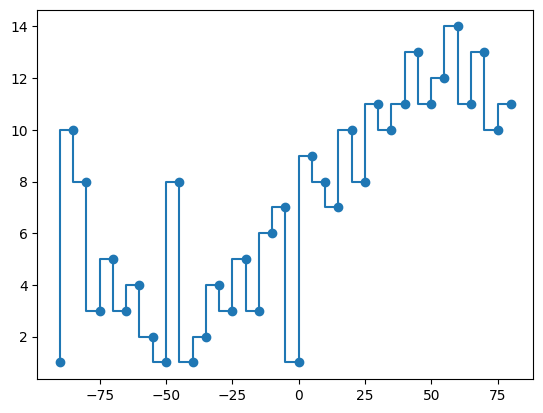

36


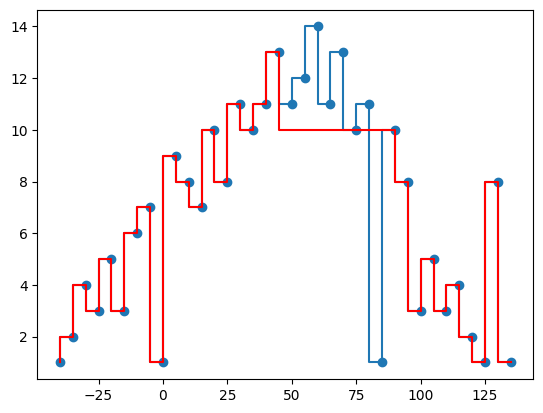

In [38]:
#RED

#PA=np.arange(2.5,177.5,5)
#print(np.where(PA==-2.5))
PA2=np.arange(-90,260,5)
plt.plot(PA,outputr[0],ds='steps')
plt.scatter(PA,outputr[0])
plt.show()

#x1=20
#x2=27
#x3=1
#x4=6
#y1=2
#y2=-16
#plt.axvline(PA[np.where(PA==-2.5)], ls='-.', c='c')
#plt.axvline(PA[x1], ls='dashed', c='r')
#plt.axvline(PA[x2],ls='dashed', c='g')

#plt.axvline(PA[x3], ls='dashed', c='b')
#plt.axvline(PA[x4],ls='dashed', c='k')

#plt.axhline(outputr[0][y1], ls='dashed', c='r')
#plt.axhline(outputr[0][y2],ls='dashed', c='g')
#plt.show()

centr=np.where(PA==-40)[0][0]

flipped_arrayr_y=np.r_[outputr[0][centr:],(outputr[0][0:centr+1])]

flipped_arrayr_x=PA2[centr:centr+len(flipped_arrayr_y)]
print(len(flipped_arrayr_y))
#np.r_[PA2[np.where(PA==-2.5)[0]:np.where(PA==87.5)[0]],outputb[0][np.where(PA==-2.5)[0]:0]]
plt.plot(flipped_arrayr_x,flipped_arrayr_y, ds='steps')
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)


x_subsetr = np.concatenate((flipped_arrayr_x[:18], flipped_arrayr_x[-10:]))
y_subsetr = np.concatenate((flipped_arrayr_y[:18], flipped_arrayr_y[-10:]))
plt.plot(x_subsetr,y_subsetr, ds='steps', color='r')

Std error [0.45198919 0.81599924]


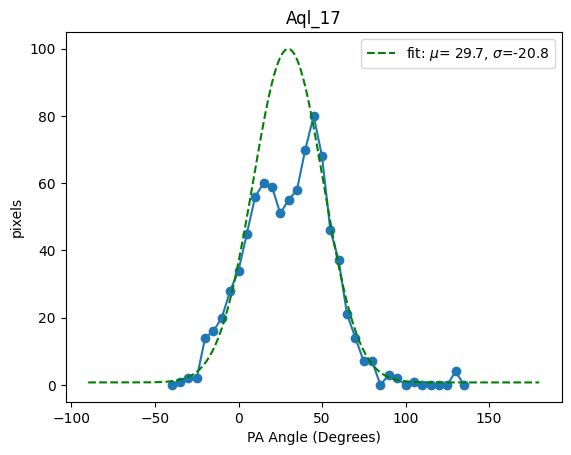

Std error [3.76350439 7.77411919]


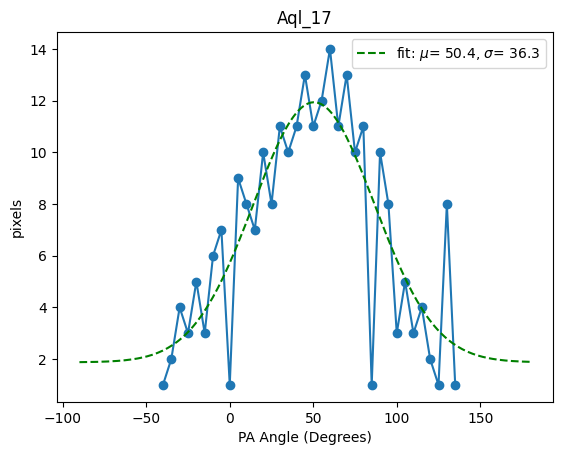

In [43]:
from scipy.optimize import curve_fit

def gaussian(x,A, mu, sig,c):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))+c

#BLUE
plt.figure()
#plt.hist(B.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subset,y_subset,p0=[300,25,50,1], maxfev=100000)
plt.scatter(flipped_array_x,flipped_array_y)
plt.plot(flipped_array_x,flipped_array_y)

x = np.linspace(-90,180,180)
plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_17")
plt.savefig("Aql_17_opening_angle_blue_hist.pdf",dpi=300)
plt.show()
plt.close()

count = 0
OAb[count,:len(outputb[0])] = outputb[0]
X_OAb[count,:len(outputb[0])] = PA
A[count,0] = popt[0]
Mu[count,0] = popt[1]
Sig[count,0]= popt[2]
C[count,0] = popt[3]
Mu_err[count,0] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,0] = np.sqrt(np.diag(pcov))[2]


#RED
plt.figure()
#plt.hist(R.flatten(),bins=binrange)
target_func = gaussian
popt, pcov = curve_fit(target_func,x_subsetr,y_subsetr,p0=[300,50,50,1], maxfev=100000)
plt.scatter(flipped_arrayr_x,flipped_arrayr_y)
plt.plot(flipped_arrayr_x,flipped_arrayr_y)

x = np.linspace(-90,180,180)

plt.plot(x, gaussian(x, *popt), 'g--',label='fit: $\mu$=%5.1f, $\sigma$=%5.1f' % tuple(popt[1:-1]))
print("Std error",np.sqrt(np.diag(pcov))[1:-1])
plt.legend()
plt.xlabel("PA Angle (Degrees)")
plt.ylabel("pixels")
plt.title("Aql_17")
plt.savefig("Aql_17_opening_angle_red_hist.pdf",dpi=300)
plt.show()
plt.close()

OAr[count,:len(outputr[0])] = outputr[0]
X_OAr[count,:len(outputr[0])] = PA
A[count,1] = popt[0]
Mu[count,1] = popt[1]
Sig[count,1]= popt[2]
C[count,1] = popt[3]
Mu_err[count,1] = np.sqrt(np.diag(pcov))[1]
Sig_err[count,1] = np.sqrt(np.diag(pcov))[2]

In [216]:
print(C)

[[ -9.24153638 138.74276657]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]]
